# Cleaning University of California Berkeley Power Consumption Dataset

The data retrieved from [UCB's energy dashboard](https://engagementdashboard.com/ucb/ucb) regarding power consumption in UCB's Mechanical Engineering building is in the form of a `json` format. Here we'll be converting it into a `csv` file for later data analysis. 


In [2]:
import numpy as np
import pandas as pd
import json
import pprint
from datetime import datetime

In [3]:
#Format into dates
def format_time(unix_timestamp):
    format = '%Y-%m-%d'
    ts = int(unix_timestamp)
    return datetime.utcfromtimestamp(ts).strftime(format)

#Create list of datetime objects from timestamps
def gen_datetimes(li):
    datetimes = []
    for time in li:
        datetimes.append(datetime.utcfromtimestamp(time))
    return datetimes

In [4]:
with open('Datasets/UCB_PowerConsumption.json') as json_file:
    data = json.load(json_file)[0]
    
pprint.pprint(data)

{'actual': {'data': [{'completeness': 2.0,
                      'timestamp': 1573632000,
                      'value': 9292.0},
                     {'completeness': 2.0,
                      'timestamp': 1573718400,
                      'value': 9245.0},
                     {'completeness': 2.0,
                      'timestamp': 1573804800,
                      'value': 9150.0},
                     {'completeness': 2.0,
                      'timestamp': 1573891200,
                      'value': 8332.0},
                     {'completeness': 2.0,
                      'timestamp': 1573977600,
                      'value': 8239.0},
                     {'completeness': 2.0,
                      'timestamp': 1574064000,
                      'value': 9245.0},
                     {'completeness': 2.0,
                      'timestamp': 1574150400,
                      'value': 9339.0},
                     {'completeness': 2.0,
                      'timestamp': 1574236800,


                      'value': 7487.0},
                     {'completeness': 2.0,
                      'timestamp': 1591686000,
                      'value': 7559.0},
                     {'completeness': 2.0,
                      'timestamp': 1591772400,
                      'value': 7540.0},
                     {'completeness': 2.0,
                      'timestamp': 1591858800,
                      'value': 7575.0},
                     {'completeness': 2.0,
                      'timestamp': 1591945200,
                      'value': 7464.0},
                     {'completeness': 2.0,
                      'timestamp': 1592031600,
                      'value': 7342.0},
                     {'completeness': 2.0,
                      'timestamp': 1592118000,
                      'value': 7294.0},
                     {'completeness': 2.0,
                      'timestamp': 1592204400,
                      'value': 7420.0},
                     {'completeness': 2.0,
       

                      'value': 8107.0},
                     {'completeness': 2.0,
                      'timestamp': 1604041200,
                      'value': 7966.0},
                     {'completeness': 2.0,
                      'timestamp': 1604127600,
                      'value': 7762.0},
                     {'completeness': 2.0,
                      'timestamp': 1604214000,
                      'value': 8058.0},
                     {'completeness': 2.0,
                      'timestamp': 1604304000,
                      'value': 8009.0},
                     {'completeness': 2.0,
                      'timestamp': 1604390400,
                      'value': 8056.0},
                     {'completeness': 2.0,
                      'timestamp': 1604476800,
                      'value': 8083.0},
                     {'completeness': 2.0,
                      'timestamp': 1604563200,
                      'value': 8007.0},
                     {'completeness': 2.0,
       

                       {'completeness': 1.0,
                        'timestamp': 1581667200,
                        'value': 8673.307},
                       {'completeness': 1.0,
                        'timestamp': 1581753600,
                        'value': 7703.1836},
                       {'completeness': 1.0,
                        'timestamp': 1581840000,
                        'value': 7662.8257},
                       {'completeness': 1.0,
                        'timestamp': 1581926400,
                        'value': 8658.464},
                       {'completeness': 1.0,
                        'timestamp': 1582012800,
                        'value': 8843.579},
                       {'completeness': 1.0,
                        'timestamp': 1582099200,
                        'value': 8863.062},
                       {'completeness': 1.0,
                        'timestamp': 1582185600,
                        'value': 8818.573},
                       {'complet

                        'timestamp': 1593500400,
                        'value': 8877.175},
                       {'completeness': 1.0,
                        'timestamp': 1593586800,
                        'value': 8875.538},
                       {'completeness': 1.0,
                        'timestamp': 1593673200,
                        'value': 8826.283},
                       {'completeness': 1.0,
                        'timestamp': 1593759600,
                        'value': 8684.158},
                       {'completeness': 1.0,
                        'timestamp': 1593846000,
                        'value': 7881.7466},
                       {'completeness': 1.0,
                        'timestamp': 1593932400,
                        'value': 7875.112},
                       {'completeness': 1.0,
                        'timestamp': 1594018800,
                        'value': 8686.243},
                       {'completeness': 1.0,
                        'timestam

In [5]:
#Split dataset
actual = data['actual']
expected = data['baseline']

#Create new dataframe
df_power = pd.DataFrame(columns = ['act_power', 'exp_power', 'date','timestamp'])
df_power.head()

,act_power,exp_power,date,timestamp


In [6]:
actual_li = actual['data']
expected_li = expected['data']
loc = 0

for i in range(len(actual_li)):
    #Get corresponding dicts
    dt1 = actual_li[i]
    dt2 = expected_li[i]
    
    #Ensure they're of the same time
    assert(dt1['timestamp'] == dt2['timestamp'])
    
    #Get data in appropriate format
    time = format_time(dt1['timestamp'])
    act_power = dt1['value']
    exp_power = dt2['value']
    ts = dt1['timestamp']
    
    #Add to dataframe
    df_power.loc[loc] = [act_power, exp_power, time, ts]
    
    #Increment location tracker
    loc += 1
    
#Print out final data
df_power.head()

,act_power,exp_power,date,timestamp
0,9292.0,8868.1940,2019-11-13,1573632000
1,9245.0,8777.3200,2019-11-14,1573718400
2,9150.0,8667.0920,2019-11-15,1573804800
3,8332.0,7767.8486,2019-11-16,1573891200
4,8239.0,7790.5220,2019-11-17,1573977600


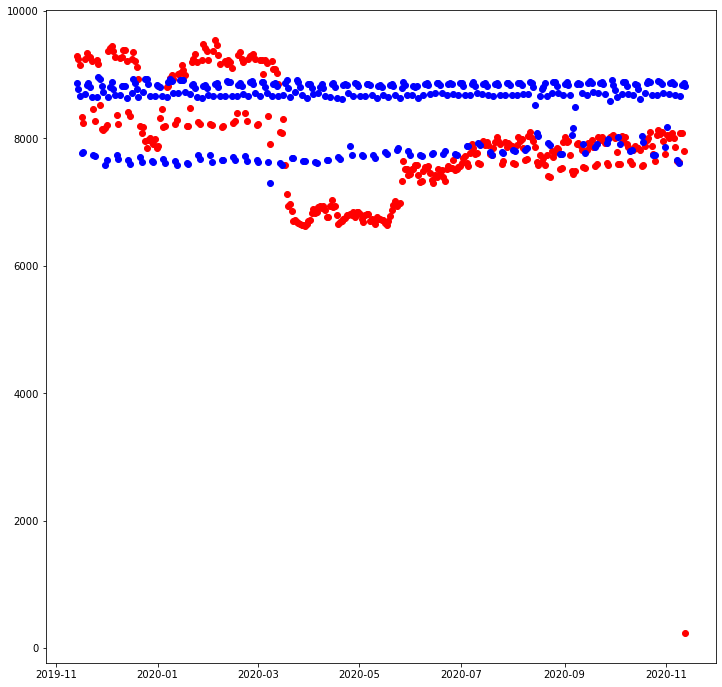

In [7]:
#Plotting data for exploratory analysis 
from matplotlib.dates import date2num
import matplotlib.pyplot as plt

#Select subset of data by altering variables. Choose entire scale by 1, 0
num_split = 1
num_piece = 0
df = np.split(df_power, num_split)[num_piece]

plt.figure(figsize=(12,12))
#Convert timestamps into correct date format for matplotlib
dates = date2num(gen_datetimes(df['timestamp']))
#Plot points
plt.plot_date(dates, df['act_power'], color='Red')
plt.plot_date(dates, df['exp_power'], color='Blue')
plt.show()

In [57]:
#Place dataset in .csv file
df_power.to_csv('Datasets/UCB_PowerConsumption.csv', index=False)

# Merging with Weather Data

In [207]:
df_weather = pd.read_csv('Datasets/Atlanta_Weather.csv', skiprows=2)
df_power = pd.read_csv('Datasets/UCB_PowerConsumption.csv')

In [208]:
df_weather.describe()

,Year,Month,Day,Hour,Minute,DNI,Wind Speed,Precipitable Water,Relative Humidity,Temperature,Pressure
count,8760.0,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2019.0,6.526027,15.720548,11.500000,30.0,213.344863,1.181016,2.571975,76.075908,17.563790,982.871119
std,0.0,3.448048,8.796749,6.922582,0.0,322.458074,0.665000,1.346187,21.411312,9.674451,4.891627
min,2019.0,1.000000,1.000000,0.000000,30.0,0.000000,0.100000,0.200000,16.720000,-6.700000,962.000000
25%,2019.0,4.000000,8.000000,5.750000,30.0,0.000000,0.700000,1.400000,59.402500,9.900000,980.000000
50%,2019.0,7.000000,16.000000,11.500000,30.0,0.000000,0.900000,2.600000,82.260000,18.200000,983.000000
75%,2019.0,10.000000,23.000000,17.250000,30.0,418.000000,1.500000,3.600000,94.780000,24.400000,986.000000
max,2019.0,12.000000,31.000000,23.000000,30.0,1037.000000,4.000000,6.000000,100.000000,38.900000,1000.000000


In [209]:
df_power.describe()

,act_power,exp_power,timestamp
count,366.000000,366.000000,3.660000e+02
mean,7906.937158,8492.607298,1.589398e+09
std,889.463622,475.480141,9.139887e+06
min,237.000000,7301.636000,1.573632e+09
25%,7507.750000,7916.461650,1.581516e+09
50%,7882.000000,8700.640500,1.589396e+09
75%,8245.000000,8848.290500,1.597280e+09
max,9543.000000,8960.755000,1.605168e+09


In [210]:
df_weather = df_weather.drop(columns=['Hour', 'Minute'])
df_weather = df_weather[df_weather.DNI != 0]
df_weather.head()

,Year,Month,Day,DNI,Wind Speed,Precipitable Water,Relative Humidity,Temperature,Pressure
14,2019,1,1,4,0.6,3.2,81.34,16.6,986
15,2019,1,1,2,0.9,3.3,75.44,17.6,986
16,2019,1,1,22,1.1,3.4,72.86,18.2,985
17,2019,1,1,5,1.0,3.5,74.13,18.3,985
18,2019,1,1,34,1.0,3.6,76.94,18.0,984


In [211]:
#Take means for each data in DataFrame
df_weather = pd.DataFrame(df_weather.groupby(['Year', 'Month', 'Day']).mean().reset_index())
df_weather

,Year,Month,Day,DNI,Wind Speed,Precipitable Water,Relative Humidity,Temperature,Pressure
0,2019,1,1,46.555556,0.811111,3.422222,82.340000,17.044444,985.000000
1,2019,1,2,16.750000,0.650000,3.225000,86.280000,15.150000,986.250000
2,2019,1,3,3.000000,0.800000,3.000000,94.200000,13.200000,980.000000
3,2019,1,4,320.500000,2.866667,1.416667,87.785000,15.216667,970.333333
4,2019,1,5,747.200000,2.070000,0.990000,72.580000,9.950000,981.900000
...,...,...,...,...,...,...,...,...,...
360,2019,12,27,85.875000,0.875000,2.325000,85.791250,13.712500,989.000000
361,2019,12,28,74.000000,1.622222,3.244444,88.767778,16.644444,985.222222
362,2019,12,29,60.285714,1.557143,3.114286,94.631429,19.185714,977.714286
363,2019,12,30,788.600000,2.080000,0.710000,66.204000,12.370000,977.100000


In [212]:
DNI = np.array(df_weather.loc[:,'DNI'], dtype=np.float32).reshape(-1,1)
print(DNI)

[[ 46.555557 ]
 [ 16.75     ]
 [  3.       ]
 [320.5      ]
 [747.2      ]
 [792.4      ]
 [652.2      ]
 [120.125    ]
 [827.5      ]
 [663.5      ]
 [773.7      ]
 [  6.3333335]
 [131.75     ]
 [ 53.25     ]
 [717.75     ]
 [783.2      ]
 [183.8      ]
 [ 52.5      ]
 [  2.       ]
 [519.8333   ]
 [806.8      ]
 [248.88889  ]
 [105.2      ]
 [371.55554  ]
 [816.       ]
 [801.3      ]
 [ 96.63636  ]
 [481.0909   ]
 [661.6667   ]
 [486.18182  ]
 [743.       ]
 [545.7273   ]
 [563.4545   ]
 [232.       ]
 [276.45456  ]
 [261.6      ]
 [ 26.25     ]
 [657.0909   ]
 [570.8182   ]
 [ 47.4      ]
 [  4.5      ]
 [ 14.875    ]
 [ 15.428572 ]
 [800.1818   ]
 [365.4      ]
 [ 10.833333 ]
 [335.       ]
 [  2.       ]
 [417.91666  ]
 [  9.5      ]
 [ 56.666668 ]
 [ 72.125    ]
 [105.2      ]
 [  3.25     ]
 [700.25     ]
 [751.4167   ]
 [152.8      ]
 [ 85.625    ]
 [ 46.375    ]
 [ 64.77778  ]
 [239.08333  ]
 [ 93.85714  ]
 [487.22223  ]
 [826.3333   ]
 [827.25     ]
 [504.5      ]
 [ 94.3333

In [213]:
# scaling the inputs using StandardScalar
from sklearn.preprocessing import StandardScaler 
min_max_scaler = StandardScaler() 
DNI_scaled = min_max_scaler.fit_transform(DNI)
print(DNI_scaled)

[[-1.46863878e+00]
 [-1.58610213e+00]
 [-1.64029074e+00]
 [-3.89026254e-01]
 [ 1.29259455e+00]
 [ 1.47072744e+00]
 [ 9.18200374e-01]
 [-1.17870224e+00]
 [ 1.60905612e+00]
 [ 9.62733507e-01]
 [ 1.39703083e+00]
 [-1.62715423e+00]
 [-1.13288820e+00]
 [-1.44225597e+00]
 [ 1.17653239e+00]
 [ 1.43447018e+00]
 [-9.27759707e-01]
 [-1.44521177e+00]
 [-1.64423180e+00]
 [ 3.96544486e-01]
 [ 1.52747750e+00]
 [-6.71245039e-01]
 [-1.23752165e+00]
 [-1.87816858e-01]
 [ 1.56373465e+00]
 [ 1.50580204e+00]
 [-1.27127075e+00]
 [ 2.43861020e-01]
 [ 9.55508471e-01]
 [ 2.63924271e-01]
 [ 1.27604234e+00]
 [ 4.98592436e-01]
 [ 5.68455279e-01]
 [-7.37803936e-01]
 [-5.62608957e-01]
 [-6.21150613e-01]
 [-1.54866278e+00]
 [ 9.37475264e-01]
 [ 5.97475350e-01]
 [-1.46531081e+00]
 [-1.63437927e+00]
 [-1.59349155e+00]
 [-1.59130991e+00]
 [ 1.50139534e+00]
 [-2.12075815e-01]
 [-1.60941970e+00]
 [-3.31881881e-01]
 [-1.64423180e+00]
 [-5.10812504e-03]
 [-1.61467433e+00]
 [-1.42879093e+00]
 [-1.36786973e+00]
 [-1.2375216

In [214]:
df_weather.insert(4,'DNI scaled', DNI_scaled)
df_weather.head()

,Year,Month,Day,DNI,DNI_scaled,Wind Speed,Precipitable Water,Relative Humidity,Temperature,Pressure
0,2019,1,1,46.555556,-1.468639,0.811111,3.422222,82.340,17.044444,985.000000
1,2019,1,2,16.750000,-1.586102,0.650000,3.225000,86.280,15.150000,986.250000
2,2019,1,3,3.000000,-1.640291,0.800000,3.000000,94.200,13.200000,980.000000
3,2019,1,4,320.500000,-0.389026,2.866667,1.416667,87.785,15.216667,970.333333
4,2019,1,5,747.200000,1.292595,2.070000,0.990000,72.580,9.950000,981.900000


In [215]:
#We have successfully scaled DNI data. 
df_weather.describe()

,Year,Month,Day,DNI,DNI_scaled,Wind Speed,Precipitable Water,Relative Humidity,Temperature,Pressure
count,365.0,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019.0,6.526027,15.720548,419.212810,1.045123e-08,1.402181,2.547456,64.303015,20.472047,982.880148
std,0.0,3.452584,8.808321,254.091612,1.001373e+00,0.631448,1.316355,15.703012,8.940029,4.842366
min,2019.0,1.000000,1.000000,1.666667,-1.645545e+00,0.233333,0.300000,30.248462,1.663636,965.555556
25%,2019.0,4.000000,8.000000,184.000000,-9.269715e-01,0.923077,1.338462,53.668333,13.300000,979.923077
50%,2019.0,7.000000,16.000000,442.600000,9.216873e-02,1.264286,2.562500,63.148462,20.738462,982.636364
75%,2019.0,10.000000,23.000000,641.866667,8.774766e-01,1.766667,3.464286,74.754000,28.573333,986.153846
max,2019.0,12.000000,31.000000,833.363636,1.632165e+00,3.800000,5.472727,100.000000,34.115385,998.900000


In [219]:
df_power[['Year', 'Month', 'Day']] = df.date.str.split('-', expand=True).apply(pd.to_numeric)
df_power.head()

,act_power,exp_power,date,timestamp,Year,Month,Day
0,9292.0,8868.1940,2019-11-13,1573632000,2019,11,13
1,9245.0,8777.3200,2019-11-14,1573718400,2019,11,14
2,9150.0,8667.0920,2019-11-15,1573804800,2019,11,15
3,8332.0,7767.8486,2019-11-16,1573891200,2019,11,16
4,8239.0,7790.5220,2019-11-17,1573977600,2019,11,17


In [277]:
df_merge = df_weather.merge(df_power[['act_power', 'Month', 'Day']], left_on=('Month', 'Day'), right_on=('Month', 'Day'), how = 'inner', suffixes=('_left','_right'))
df_merge = df_merge.rename(columns={'act_power': 'Power Consumption', 'DNI_scaled': 'DNI Scaled'})
df_merge.head()

,Year,Month,Day,DNI,DNI Scaled,Wind Speed,Precipitable Water,Relative Humidity,Temperature,Pressure,Power Consumption
0,2019,1,1,46.555556,-1.468639,0.811111,3.422222,82.340,17.044444,985.000000,7888.0
1,2019,1,2,16.750000,-1.586102,0.650000,3.225000,86.280,15.150000,986.250000,8323.0
2,2019,1,3,3.000000,-1.640291,0.800000,3.000000,94.200,13.200000,980.000000,8468.0
3,2019,1,4,320.500000,-0.389026,2.866667,1.416667,87.785,15.216667,970.333333,8177.0
4,2019,1,5,747.200000,1.292595,2.070000,0.990000,72.580,9.950000,981.900000,8188.0


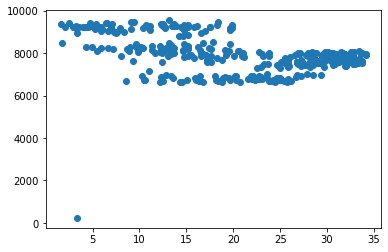

In [278]:
#Exploratory Analysis between Temperature and Power Consumption
import matplotlib.pyplot as plt

plt.scatter(df_merge['Temperature'], df_merge['Power Consumption'])
plt.show()

In [279]:
df_power.to_csv('Datasets/UCB_PowerWeatherData.csv', index=False)